In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux import detgeo
from nuflux import data

ModuleNotFoundError: No module named 'useful_data'

In [1]:
import numpy as np
arr = np.array([1,2,3], dtype = float)
print(arr)

[1. 2. 3.]


In [2]:
from DarkNews import cfourvec

/n/helmod/apps/centos7/Core/Anaconda3/2021.05-jupyterood-fasrc01/x/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


ImportError: cannot import name 'cfourvec' from 'DarkNews' (/n/home06/lbojorquezlopez/.local/lib/python3.8/site-packages/DarkNews/__init__.py)

In [4]:
import sys
sys.executable

'/n/helmod/apps/centos7/Core/Anaconda3/2021.05-jupyterood-fasrc01/x/bin/python'

In [59]:
mdb = data.get_particles("mutristan_small")
#mdb2 = data.get_particles("mutristan_small")
#mdb3 = data.get_particles("mutristan_small")

In [60]:
L = 11700
cc = detgeo.get_quantities(mdb)
_ = cc.completely_circular()
#_ = cc.straight_segment_at_detector(L)
#cc2 = detgeo.get_quantities(mdb2)
#_=cc2.straight_segment_at_detector(L)
#cc3 = detgeo.get_quantities(mdb3)
#_=cc3.straight_segment_at_detector(L)

In [61]:
geom = "approximate_muon_detector_2"
particle = 'numu'
sim = detgeo.SimulateDetector(cc, geom, particle).run()

1.42e+11 numu events


In [62]:
sim.get_face_counts()

4.29e+10 decays in muon_detector
2.02e+09 decays in solenoid
2.57e+10 decays in hcal
5.08e+09 decays in ecal
6.67e+10 decays in nozzles
1.42e+11 total decays


In [39]:
sim.facecounts

{'muon_detector': 43419378137.38291,
 'solenoid': 2142550790.2731144,
 'hcal': 23451705729.093426,
 'ecal': 4414142820.888749,
 'nozzles': 65999424884.83158}

In [69]:
_, _ = detgeo.SimulateDetector(cc2, geom, particle).run()

1.79e+11 numu events
3.03e+11 nue events


In [70]:
_, _ = detgeo.SimulateDetector(cc3, geom, particle).run()

1.79e+11 numu events
3.05e+11 nue events


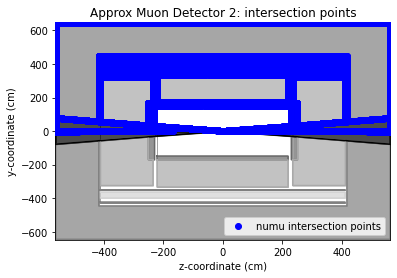

In [66]:
# intersection points?
detgeo.plot_sim(geom)
#particle = -1
arr = sim.intersection_points[sim.mask]
#arr2 = sim2.intersection_points[sim2.mask]
#plt.scatter(arr[particle, :,2], np.sqrt(arr[particle,:,1]**2 + arr[particle, :, 0]**2), alpha = 1, zorder = 10)
plt.scatter(arr[:, :,2], arr[:,:,1], alpha = 1, zorder = 10, c = 'blue', label ='numu intersection points')
#plt.scatter(sim.intersection_points[p, :,2], sim.intersection_points[p,:,1], alpha = 1, zorder = 10, c = 'red', label ='nue intersection points')
#plt.scatter(arr2[:,:,2], arr2[:,:,1], alpha = 1, zorder = 10,c ='red', label = 'numu intersection points')
plt.xlim(-564, right=564)
plt.ylim(-648, 648)
plt.legend(loc ='lower right')
plt.title("Approx Muon Detector 2: intersection points")
plt.savefig("plots_Luc/paper/example_intersection_points.jpg", bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'Approx Muon Detector 2: event points')

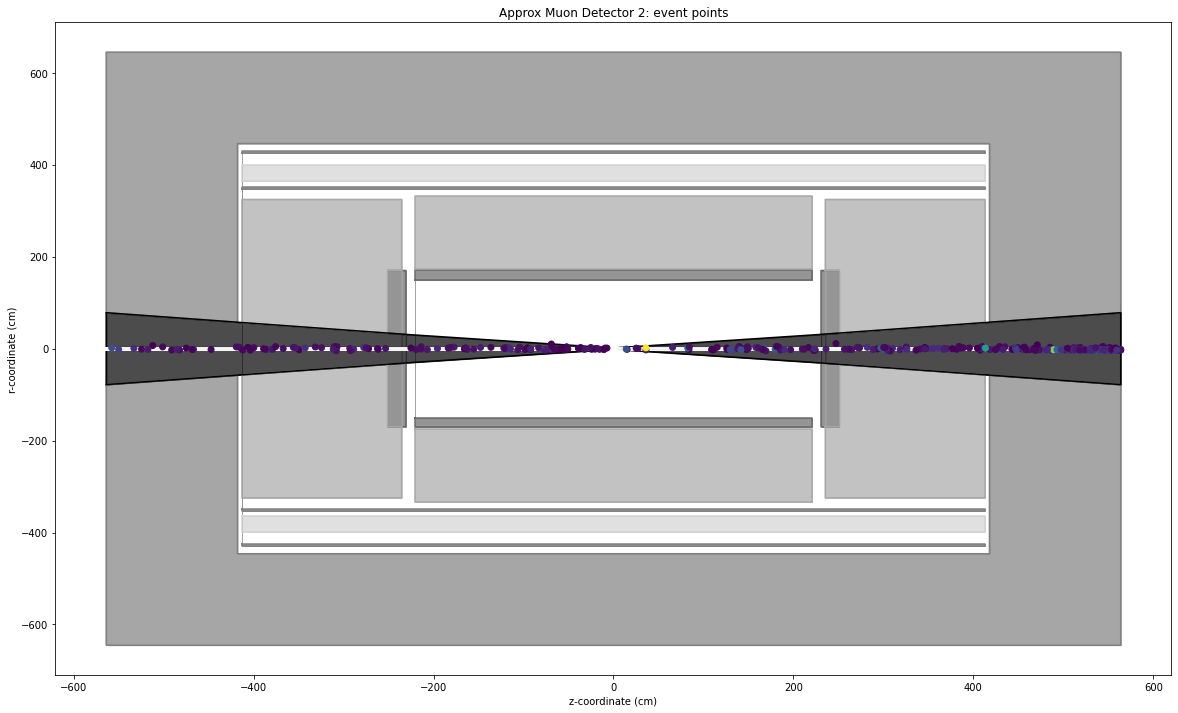

In [53]:
# event locations
detgeo.plot_sim(geom)
arr = sim.events_position[sim.mask]
#arr2= sim2.events_position[sim2.mask]
mask = (sim.part_face_counts[sim.mask][:,:] > 0)
#mask2 = (sim.part_face_counts[sim2.mask][:,:] > 0)
plt.scatter(arr[:, :,2][mask], arr[:,:,1][mask], alpha = 1, zorder = 10, c = sim.part_face_counts[sim.mask][:,:][mask])
#plt.scatter(arr2[:, :,2][mask2], arr2[:,:,1][mask2], alpha = 1, zorder = 10, c = sim2.part_face_counts[sim2.mask][:,:][mask2])
plt.title("Approx Muon Detector 2: event points")
#plt.savefig("plots_Luc/det_2/approx_detector_2_events.jpg", bbox_inches='tight', dpi=300)

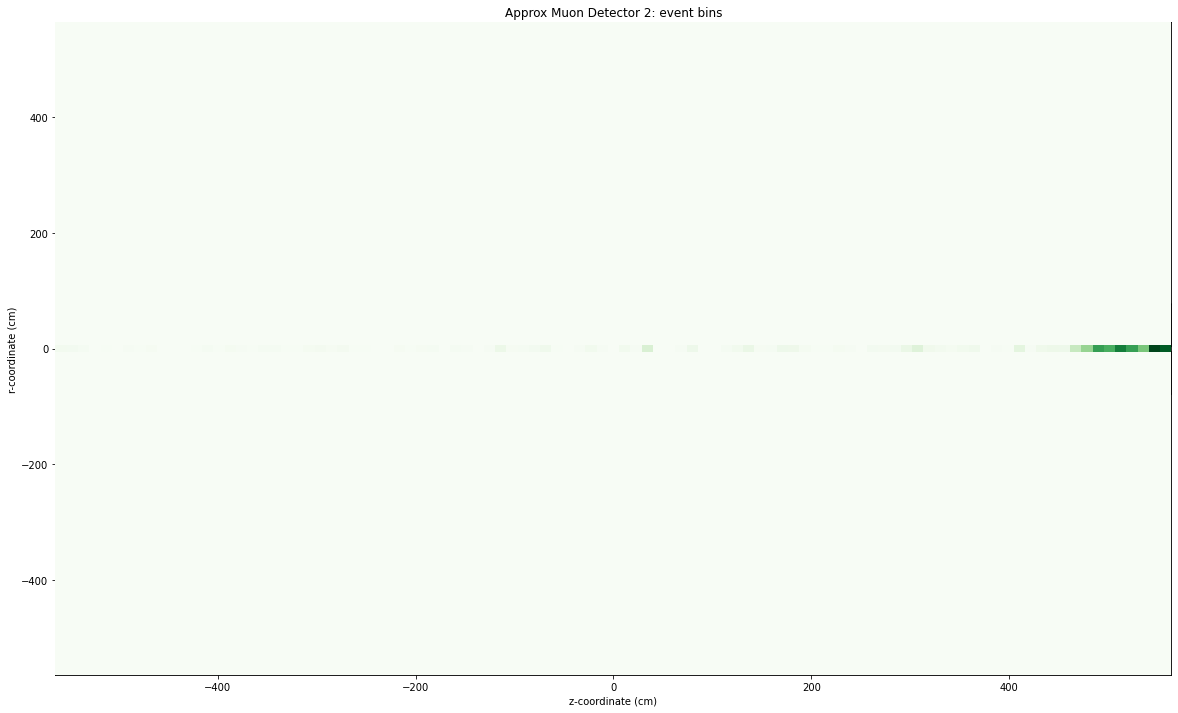

In [54]:
# densities approximated

#plotallthings()
detgeo.plot_sim(geom)

arr = sim.events_position[sim.mask]
#arr2 = sim2.events_position[sim2.mask]

bs = np.linspace(-564, 564, 100)
#bs2 = np.linspace(-645, 645, 100)

plt.hist2d(arr[:, :,2][mask].flatten(), arr[:,:,1][mask].flatten(), alpha = 1, zorder = 10, bins = (bs), weights = sim.part_face_counts[sim.mask][mask].flatten(), cmap ='Greens')


plt.title("Approx Muon Detector 2: event bins")
plt.savefig("plots_Luc/det_2/approx_detector_2_events_bins.jpg", bbox_inches='tight', dpi=300)

In [49]:
np.mean(sim.line_integrals[sim.mask])

4.54216440063433e+27

In [39]:
s= 1- np.exp(-1 * np.mean(sim.cs) * np.mean(sim.line_integrals))
s

1.5572498845983773e-10

In [40]:
# using approximation of exponential and weights and <l*Ntargets>
print("{:.3g}".format(3.6e-9 / (1.6e-19) * (1 - 1/np.e) *40* 365.25 * 24* 3600 * 50 * s))

1.4e+11


In [38]:
np.mean(sim.cs)

1.1733610072747881e-36

In [52]:
ad = np.mean(np.sum(sim.distances[:,1:], axis = 1))

In [46]:
from nuflux.detector_geometries import useful_data as ud

In [53]:
ad * ud.Fe.N

1.3645054919661022e+26

In [54]:
s= 1- np.exp(-1 * np.mean(sim.cs) *ad * ud.Fe.N )

In [55]:
# using approximation of exponential and weights and <l>*  <Ntargets> from Fe
print("{:.3g}".format(3.6e-9 / (1.6e-19) * (1 - 1/np.e) *40* 365.25 * 24* 3600 * 50 * s))

1.44e+11


In [56]:
3.6e-9 / (1.6e-19) * (1 - 1/np.e) *40* 365.25 * 24* 3600 * 50

8.976693486279641e+20

In [20]:
class baseclass:
    def __init__(self, attr1):
        self.attr1 = attr1

class sub(baseclass):
    def __init__(self, attr2):
        self.attr2 = attr2
        super().__init__()

In [21]:
face1 = baseclass(9)

In [22]:
obj = sub(face1, 20)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [81]:
events_numu = {1000: [1.39e11, 1.38e11, 1.41e11, 1.38e11, 1.38e11], 2000: [1.20e11, 1.18e11, 1.20e11, 1.17e11, 1.17e11], 4000:[9.13e10, 9.12e10, 9.22e10, 9.02e10, 8.79e10], 6000:[7.19e10, 7.00e10, 7.32e10, 7.10e10, 6.82e10], 8000:[4.28e10, 4.25e10, 4.28e10, 4.25e10, 4.14e10], 10000:[1.89e10, 2.03e10, 1.88e10, 2.01e10, 1.84e10], 11000: [3.73e9, 3.58e9, 3.78e9, 3.83e9, 3.47e9], 12000: [2.76e8, 2.10e8, 3.02e8, 3.07e8, 3.02e8], 14000:[4.58e8, 4.22e8, 5.21e8, 5.50e8, 5.01e8], 18000:[1.61e9, 1.73e9, 1.74e9, 1.47e9, 1.75e9], 22000:[4.77e9, 5.09e9, 4.92e9, 4.93e9, 5.60e9], 26000:[1.14e10, 1.22e10, 1.18e10, 1.12e10, 1.19e10], 30000:[2.29e10, 2.32e10, 2.37e10, 2.30e10, 2.55e10], 34000:[3.91e10, 3.94e10, 4.33e10, 4.25e10, 4.60e10], 38000:[6.32e10, 6.13e10, 6.66e10, 6.61e10, 7.07e10], 42000:[9.65e10, 9.13e10, 9.58e10, 9.61e10, 1.01e11], 46000:[1.34e11, 1.30e11, 1.33e11, 1.36e11, 1.35e11], 50000:[1.75e11, 1.75e11, 1.76e11, 1.79e11, 1.79e11]} #cm

events_nue  = {1000: [2.35e11, 2.37e11, 2.35e11, 2.43e11, 2.35e11], 2000: [2.01e11, 2.01e11, 2.02e11, 2.05e11, 2.00e11], 4000:[1.54e11, 1.56e11, 1.55e11, 1.55e11, 1.52e11], 6000:[1.22e11, 1.23e11, 1.24e11, 1.22e11, 1.18e11], 8000:[7.34e10, 7.40e10, 7.45e10, 7.36e10, 7.21e10], 10000:[3.18e10, 3.52e10, 3.29e10, 3.27e10, 3.23e10], 11000: [6.08e9, 6.65e9, 6.50e9, 6.53e9, 6.60e9], 12000: [4.59e8, 5.02e8, 4.29e8, 4.65e8, 4.87e8], 14000:[8.64e8, 8.36e8, 7.05e8, 7.71e8, 7.15e8], 18000:[2.94e9, 2.78e9, 2.50e9, 2.86e9, 2.32e9], 22000:[7.87e9, 8.71e9, 9.11e9, 9.25e9, 8.61e9], 26000:[2.12e10, 2.10e10, 2.04e10, 2.01e10, 2.04e10], 30000:[3.98e10, 4.04e10, 4.04e10, 4.08e10, 4.36e10], 34000:[7.06e10, 7.43e10, 7.28e10, 7.32e10, 7.49e10], 38000:[1.12e11, 1.19e11, 1.14e11, 1.11e11, 1.18e11], 42000:[1.60e11, 1.72e11, 1.61e11, 1.62e11, 1.69e11], 46000:[2.26e11, 2.31e11, 2.17e11, 2.30e11, 2.29e11], 50000:[2.95e11, 3.08e11, 2.93e11, 3.03e11, 3.05e11]} #cm

events_numu_2 = {0.0001: [1.47e11,1.46e11,1.39e11, 1.46e11, 1.40e11], 0.1:[1.43e11, 1.46e11, 1.46e11, 1.45e11, 1.45e11], 1:[1.43e11, 1.44e11, 1.41e11, 1.48e11, 1.47e11], 10:[1.41e11, 1.46e11, 1.44e11, 1.39e11, 1.43e11], 100:[1.41e11,1.46e11,1.47e11,1.43e11,1.44e11], 1000:[1.43e11, 1.38e11,1.41e11, 1.46e11,1.42e11], 2000:[1.31e11,1.29e11,1.28e11,1.32e11,1.27e11], 4000:[1.28e11,1.27e11,1.31e11, 1.26e11, 1.29e11,1.29e11], 6000:[1.38e11,1.42e11,1.36e11,1.44e11,1.39e11], 8000:[1.37e11,1.45e11,1.41e11,1.42e11,1.47e11], 10000:[1.48e11,1.54e11,1.54e11,1.49e11,1.47e11], 12000:[1.63e11,1.59e11,1.55e11,1.55e11,1.55e11], 14000:[1.81e11,1.83e11,1.87e11,1.78e11,1.84e11],16000:[2.12e11,2.05e11,2.10e11,2.17e11,2.14e11], 18000:[2.42e11,2.38e11,2.31e11,2.32e11,2.39e11], 20000:[2.54e11,2.54e11,2.63e11,2.60e11,2.63e11], 22000:[2.82e11,2.86e11,2.81e11,2.86e11,2.82e11], 24000:[3.08e11,3.09e11,3.04e11,3.11e11,3.11e11], 26000:[3.33e11,3.33e11,3.41e11,3.37e11,3.25e11], 28000:[3.64e11,3.60e11,3.47e11,3.50e11,3.48e11],30000:[3.72e11,3.70e11,3.79e11,3.74e11,3.80e11]} #cm
events_nue_2  = {0.0001: [2.46e11,2.48e11, 2.41e11, 2.41e11,2.51e11], 0.1:[2.42e11, 2.46e11, 2.38e11, 2.48e11, 2.53e11], 1:[2.46e11, 2.46e11, 2.43e11, 2.47e11, 2.47e11], 10:[2.44e11, 2.50e11, 2.48e11, 2.47e11, 2.39e11], 100:[2.44e11,2.50e11,2.48e11,2.50e11,2.43e11], 1000:[2.46e11, 2.45e11,2.36e11, 2.46e11,2.47e11], 2000:[2.21e11,2.18e11,2.17e11,2.25e11,2.16e11], 4000:[2.17e11,2.15e11,2.25e11, 2.15e11, 2.17e11,2.24e11], 6000:[2.33e11,2.49e11,2.37e11,2.46e11,2.33e11], 8000:[2.39e11,2.45e11,2.38e11,2.41e11,2.40e11], 10000:[2.53e11,2.51e11,2.48e11,2.51e11,2.49e11], 12000:[2.64e11,2.68e11,2.65e11,2.69e11,2.51e11], 14000:[3.15e11,3.02e11,3.09e11,3.09e11,3.18e11],16000:[3.55e11,3.52e11,3.64e11,3.77e11,3.68e11], 18000:[4.18e11,4.10e11,4.10e11,4.00e11,4.15e11], 20000:[4.51e11,4.39e11,4.58e11,4.46e11,4.43e11], 22000:[4.87e11,4.79e11,4.83e11,4.83e11,4.88e11], 24000:[5.25e11,5.22e11,5.26e11,5.29e11,5.34e11], 26000:[5.67e11,5.72e11,5.78e11,5.69e11,5.51e11], 28000:[6.18e11,6.10e11,5.88e11,5.96e11,5.95e11],30000:[6.33e11,6.34e11,6.56e11,6.49e11,6.45e11]} #cm


In [82]:
x = [key for key in events_numu.keys()]
x2 = [key for key in events_numu_2.keys()]
numu_mean = []
numu_std = []
nue_mean = []
nue_std = []

numu_mean2 = []
numu_std2 = []
nue_mean2 = []
nue_std2 = []
for value in events_numu.values():
    numu_mean.append(np.mean(value))
    numu_std.append(np.std(value))
for value in events_nue.values():
    nue_mean.append(np.mean(value))
    nue_std.append(np.std(value))

for value in events_nue_2.values():
    nue_mean2.append(np.mean(value))
    nue_std2.append(np.std(value))

for value in events_numu_2.values():
    numu_mean2.append(np.mean(value))
    numu_std2.append(np.std(value))


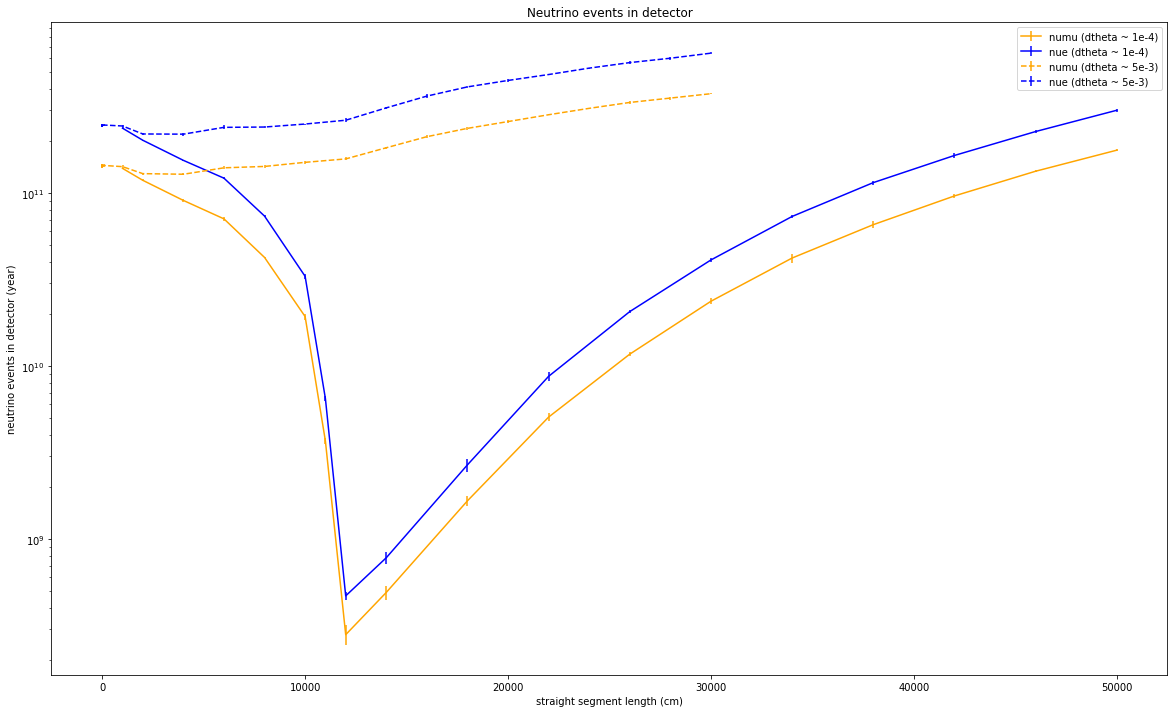

In [98]:
plt.figure(figsize = (20,12))
plt.yscale('log')
plt.errorbar(x, numu_mean, numu_std, label= 'numu (dtheta ~ 1e-4)', c=  'orange')
plt.errorbar(x, nue_mean, nue_std, label = 'nue (dtheta ~ 1e-4)', c='blue')
plt.errorbar(x2, numu_mean2, numu_std2, label= 'numu (dtheta ~ 5e-3)', c='orange', linestyle = '--')
plt.errorbar(x2, nue_mean2, nue_std2, label = 'nue (dtheta ~ 5e-3)', c='blue', linestyle = '--')
plt.legend()
plt.title("Neutrino events in detector")
plt.xlabel("straight segment length (cm)")
plt.ylabel("neutrino events in detector (year)")
plt.savefig("plots_Luc/events_as_a_function_of_ssl.jpg", bbox_inches='tight', dpi=300)

In [99]:
3.6e-9 / (1.6e-19) * (1 - 1/np.e) *40* 365.25 * 24* 3600 * 50

8.976693486279641e+20

In [101]:
9e13* (1 - 1/np.e) * 365.25 * 24* 3600 /2

8.97669348627964e+20

In [ ]:
1 Watt = 6.241509074461E+18 eV / s

In [102]:
1.5e12 / 6.241509074461E+18

2.403264950999909e-07

In [103]:
5.3e6 / 2.403264950999909e-07

22053332063095.53

In [104]:
1e12 / 6.241509074461E+18

1.6021766339999393e-07

In [109]:
9e6 / (1.6021766339999393e-07)

56173581670148.99

In [113]:
9e13

71188951809119.69

In [120]:
3.6e-9 / (1.6e-19) *40 *50 * 1e12 / 6.241509074461E+18

8651753.823599672

In [115]:
3.6e-9 / (1.6e-19) *40 *50

45000000000000.0

In [122]:
1.8e12 *2 *5 * 7e12 /6.241509074461E+18

20187425.58839923